<a href="https://www.kaggle.com/code/nursenaglhan/audi-a1-price-prediction?scriptVersionId=205146206" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("//kaggle//input//audi-a1-listings//Audi_A1_listings.csv")
print(df.head(3))
print(df.info())


   index    Year       Type  Mileage(miles) Engine          PS Transmission  \
0      0  2018.0  Hatchback         44000.0   1.6L  114.398422       Manual   
1      4  2016.0  Hatchback         42596.0   1.0L   93.688363       Manual   
2      7  2015.0  Hatchback         42700.0   1.4L  123.274162       Manual   

     Fuel  Number_of_Owners  Price(£)  \
0  Diesel                 1   14995.0   
1  Petrol                 3   10755.0   
2  Petrol                 2   10799.0   

                                                href          PPY  \
0  https://www.autotrader.co.uk/car-details/20221...  2499.166667   
1  https://www.autotrader.co.uk/car-details/20221...  2688.750000   
2  https://www.autotrader.co.uk/car-details/20221...  3599.666667   

   MileageRank  PriceRank  PPYRank  Score  
0          215        163      340    718  
1          222        330      276    828  
2          221        327       94    642  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 

In [3]:
df = df.drop(columns=['index', "href", "MileageRank", "PriceRank", "PPYRank", "Score"])
print(df.head(3))
print(df.info())


     Year       Type  Mileage(miles) Engine          PS Transmission    Fuel  \
0  2018.0  Hatchback         44000.0   1.6L  114.398422       Manual  Diesel   
1  2016.0  Hatchback         42596.0   1.0L   93.688363       Manual  Petrol   
2  2015.0  Hatchback         42700.0   1.4L  123.274162       Manual  Petrol   

   Number_of_Owners  Price(£)          PPY  
0                 1   14995.0  2499.166667  
1                 3   10755.0  2688.750000  
2                 2   10799.0  3599.666667  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              471 non-null    float64
 1   Type              471 non-null    object 
 2   Mileage(miles)    471 non-null    float64
 3   Engine            471 non-null    object 
 4   PS                471 non-null    float64
 5   Transmission      471 non-null    object 
 6   Fuel         

In [4]:
  
df["Engine"]=df["Engine"].str.replace("L", "")
df["Engine"]=pd.to_numeric(df["Engine"])
df=pd.get_dummies(df,columns=["Type","Transmission","Fuel"],drop_first=True)
print(df.head(3))
print(df.info())


     Year  Mileage(miles)  Engine          PS  Number_of_Owners  Price(£)  \
0  2018.0         44000.0     1.6  114.398422                 1   14995.0   
1  2016.0         42596.0     1.0   93.688363                 3   10755.0   
2  2015.0         42700.0     1.4  123.274162                 2   10799.0   

           PPY  Transmission_Manual  Fuel_Petrol  
0  2499.166667                 True        False  
1  2688.750000                 True         True  
2  3599.666667                 True         True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 471 non-null    float64
 1   Mileage(miles)       471 non-null    float64
 2   Engine               471 non-null    float64
 3   PS                   471 non-null    float64
 4   Number_of_Owners     471 non-null    int64  
 5   Price(£)             471 non

In [5]:
y=df["Price(£)"]
x=df.drop("Price(£)",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70, random_state=22)
lm=LinearRegression()
model=lm.fit(x_train,y_train)
print(model.score(x_test,y_test))



0.9563152741632539


In [6]:
model.predict([[2016,30000,1.6,93.688363,1,2688.750000,1,1]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9857.57681314])

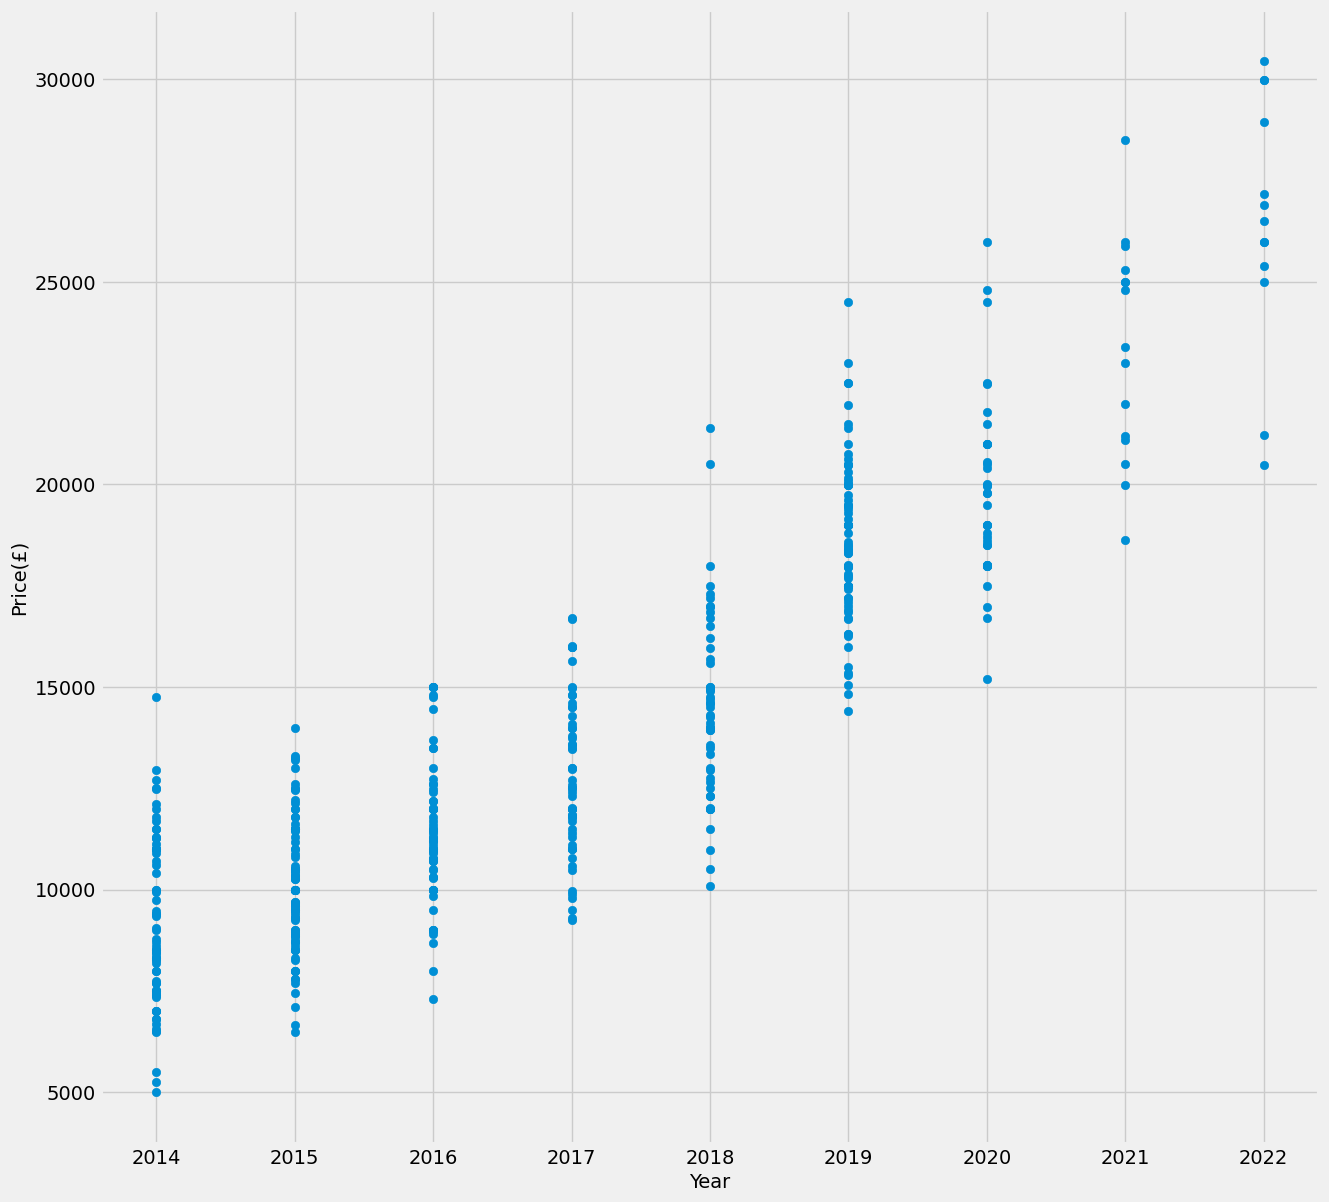

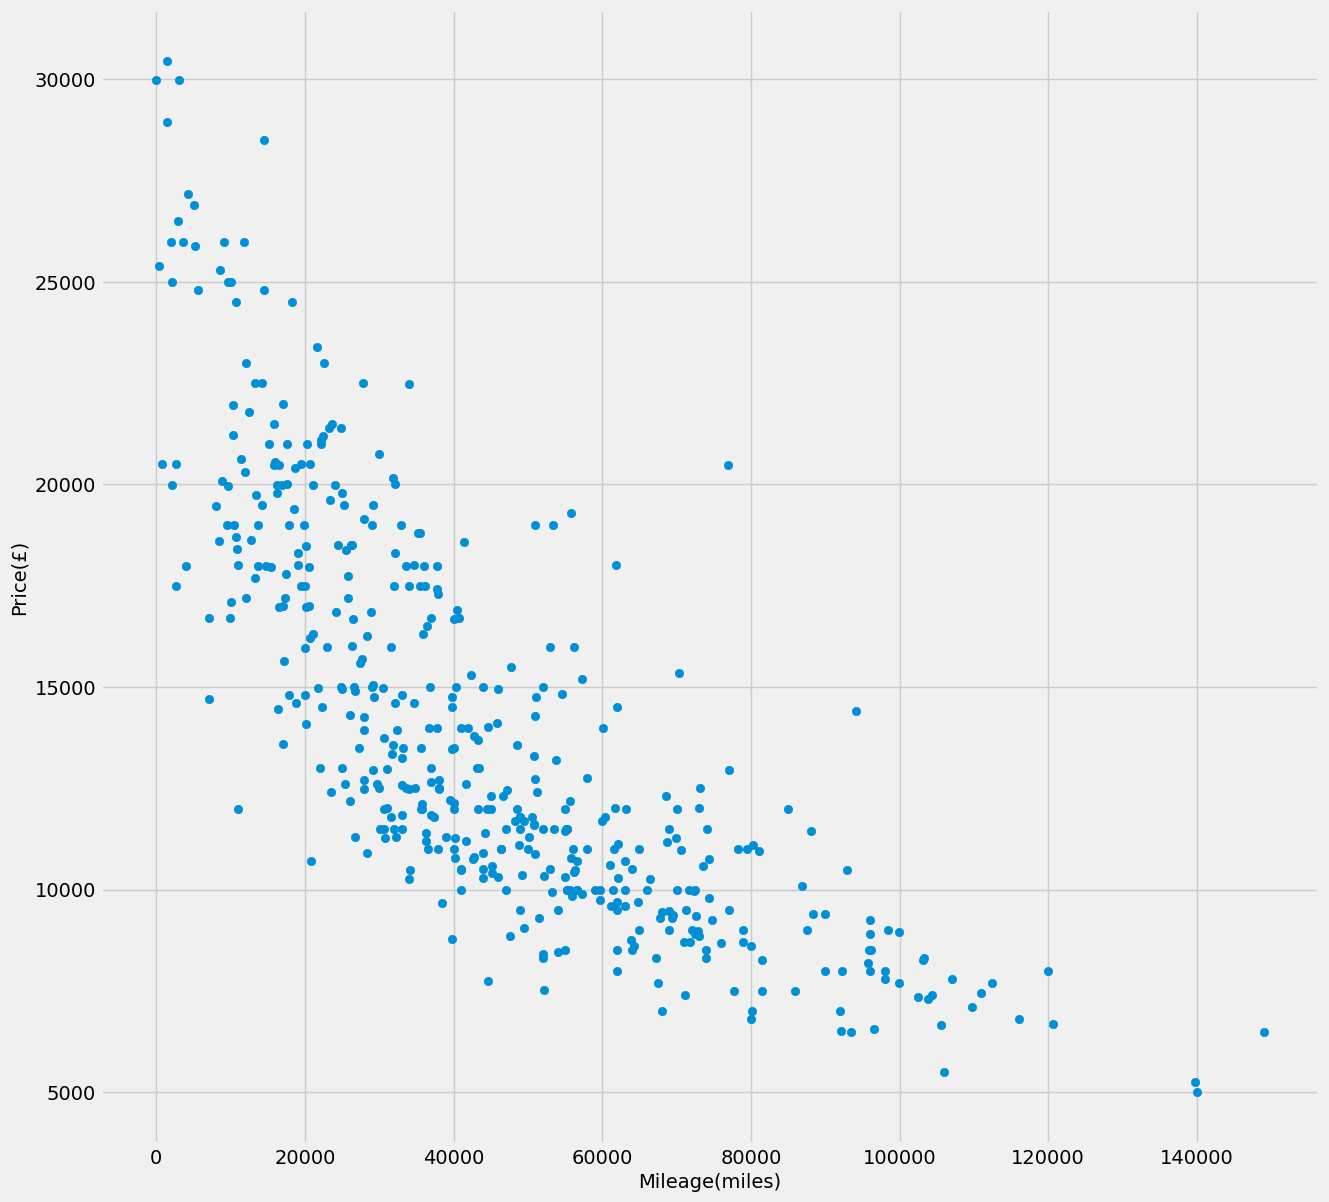

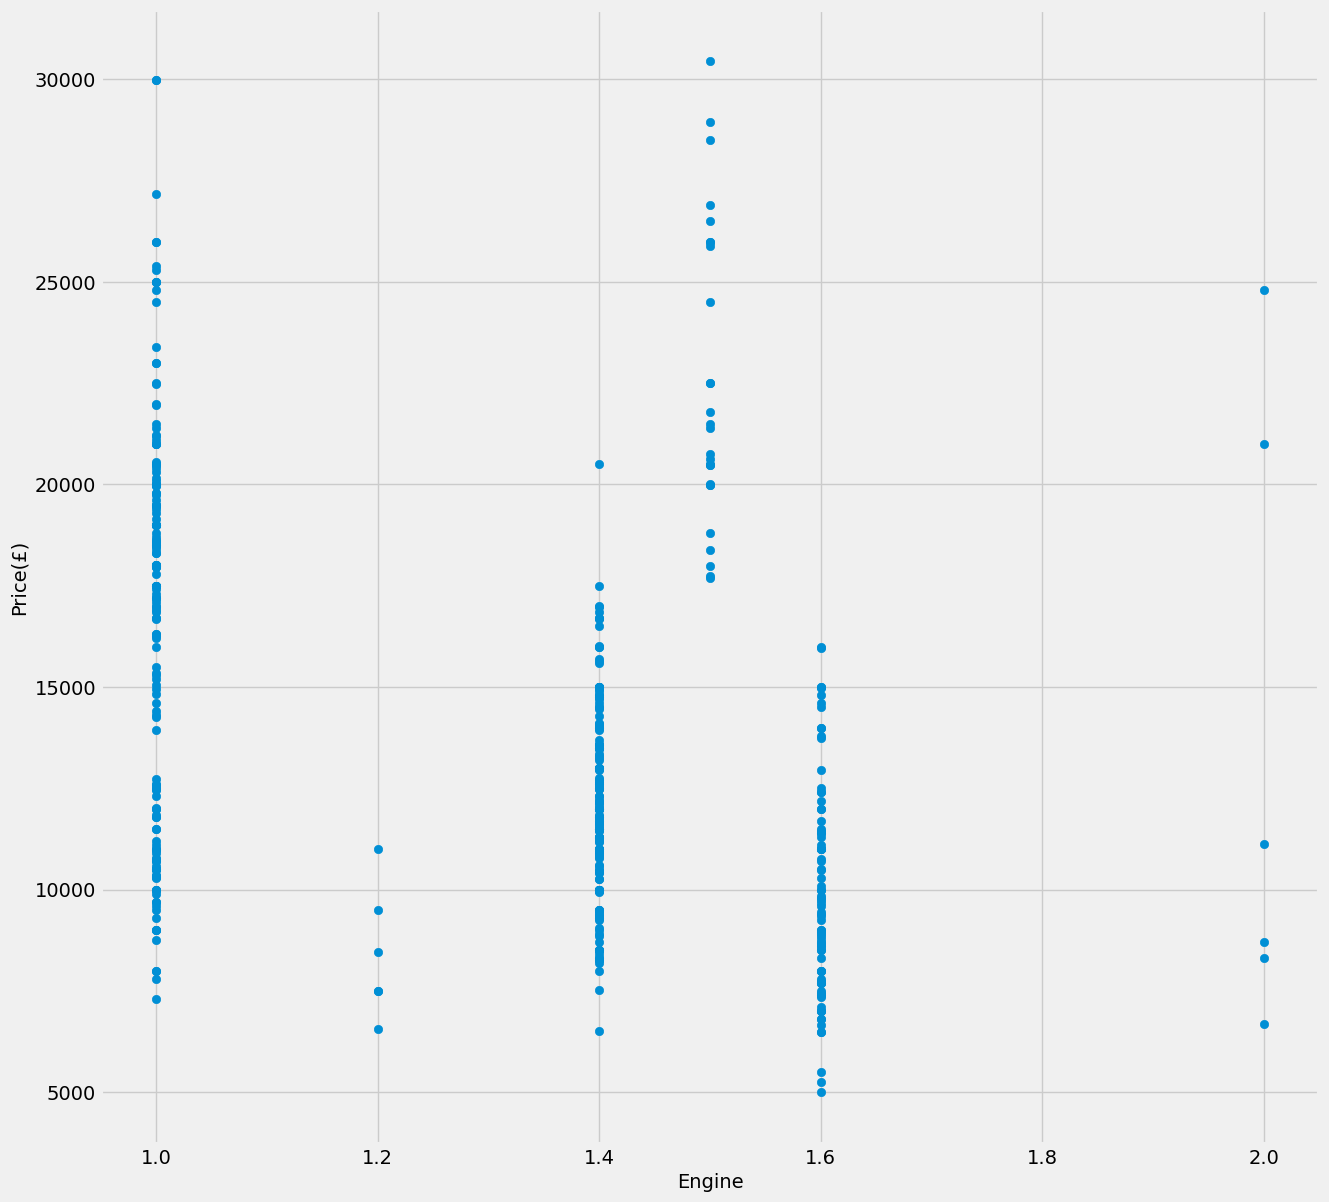

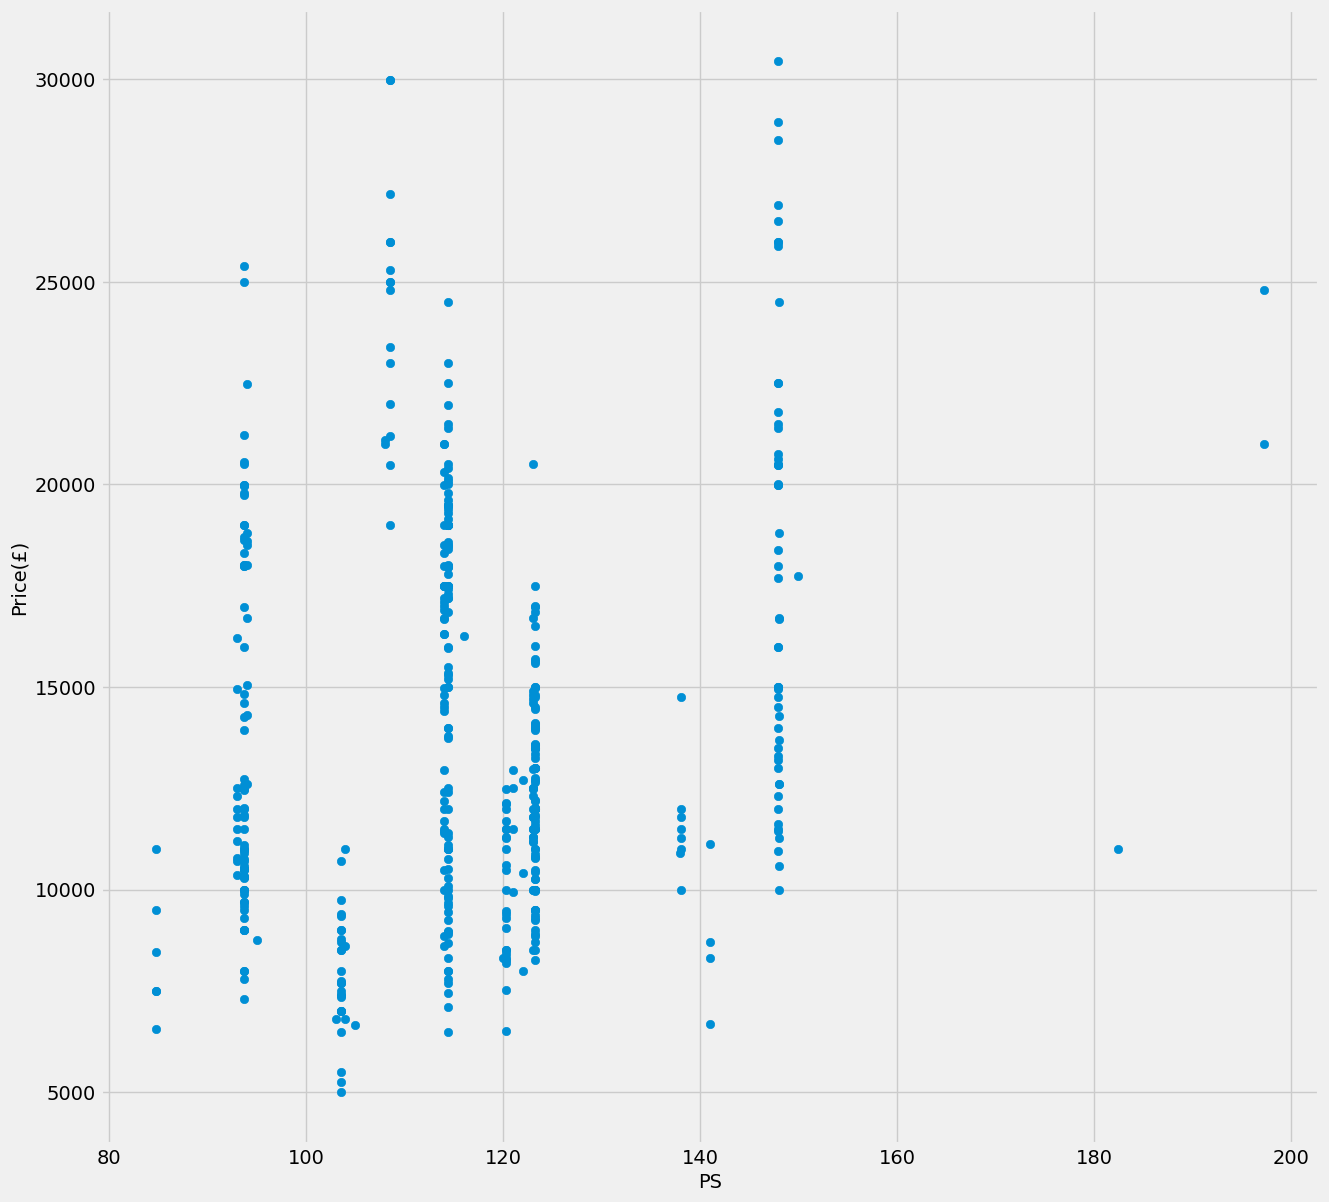

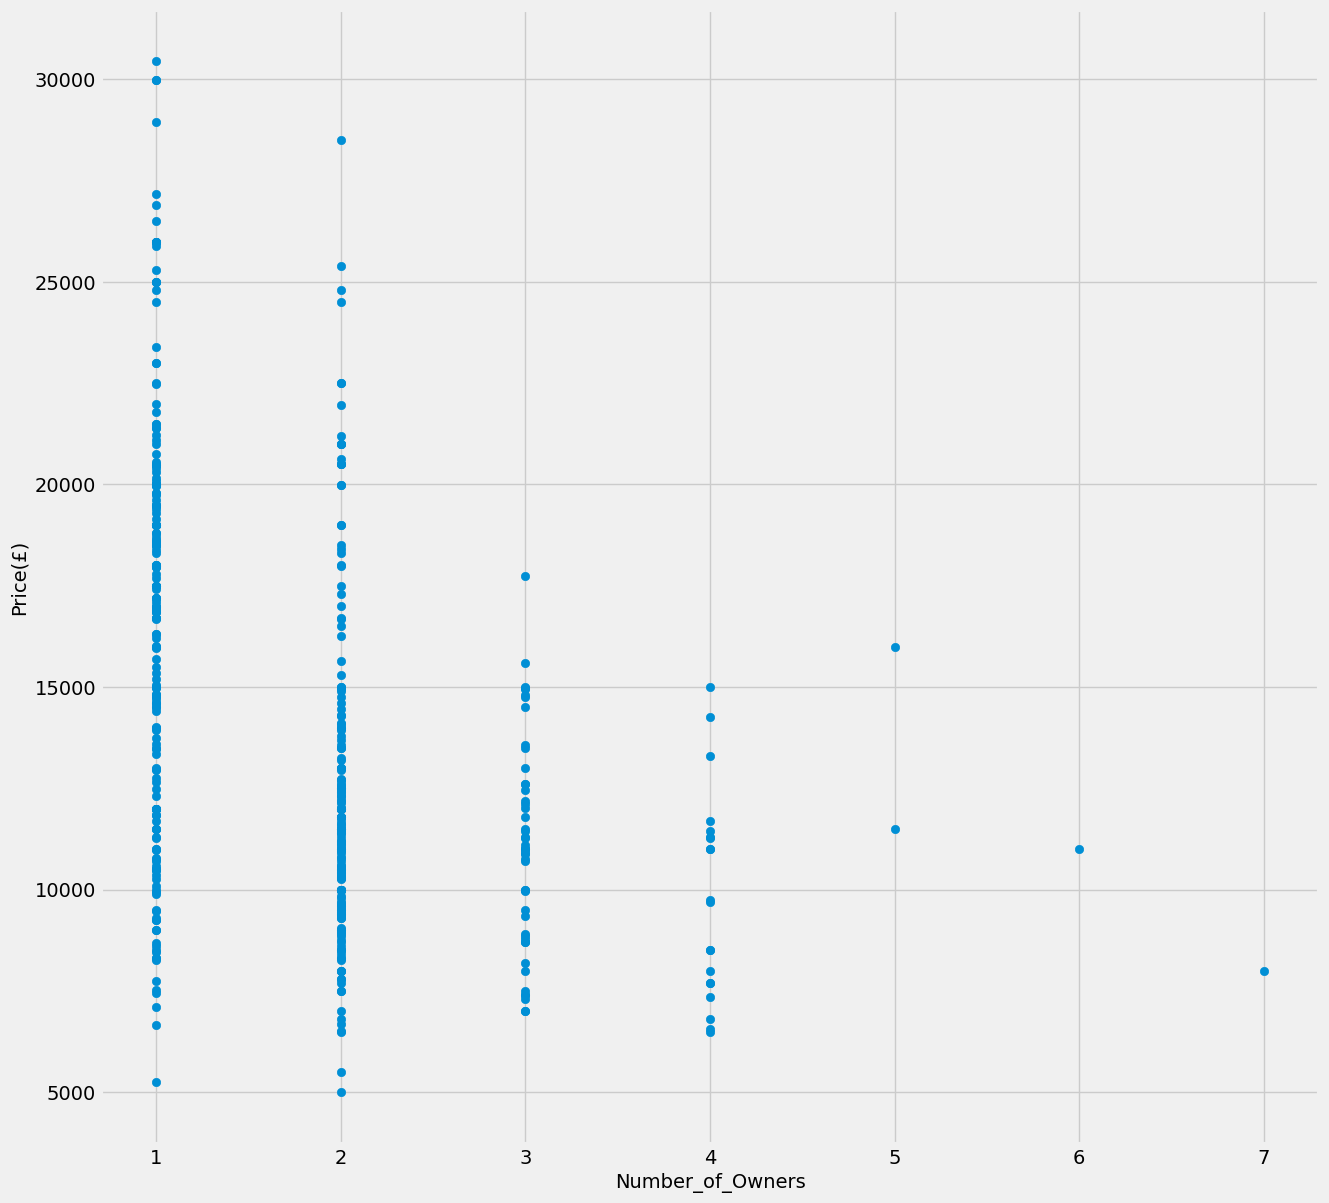

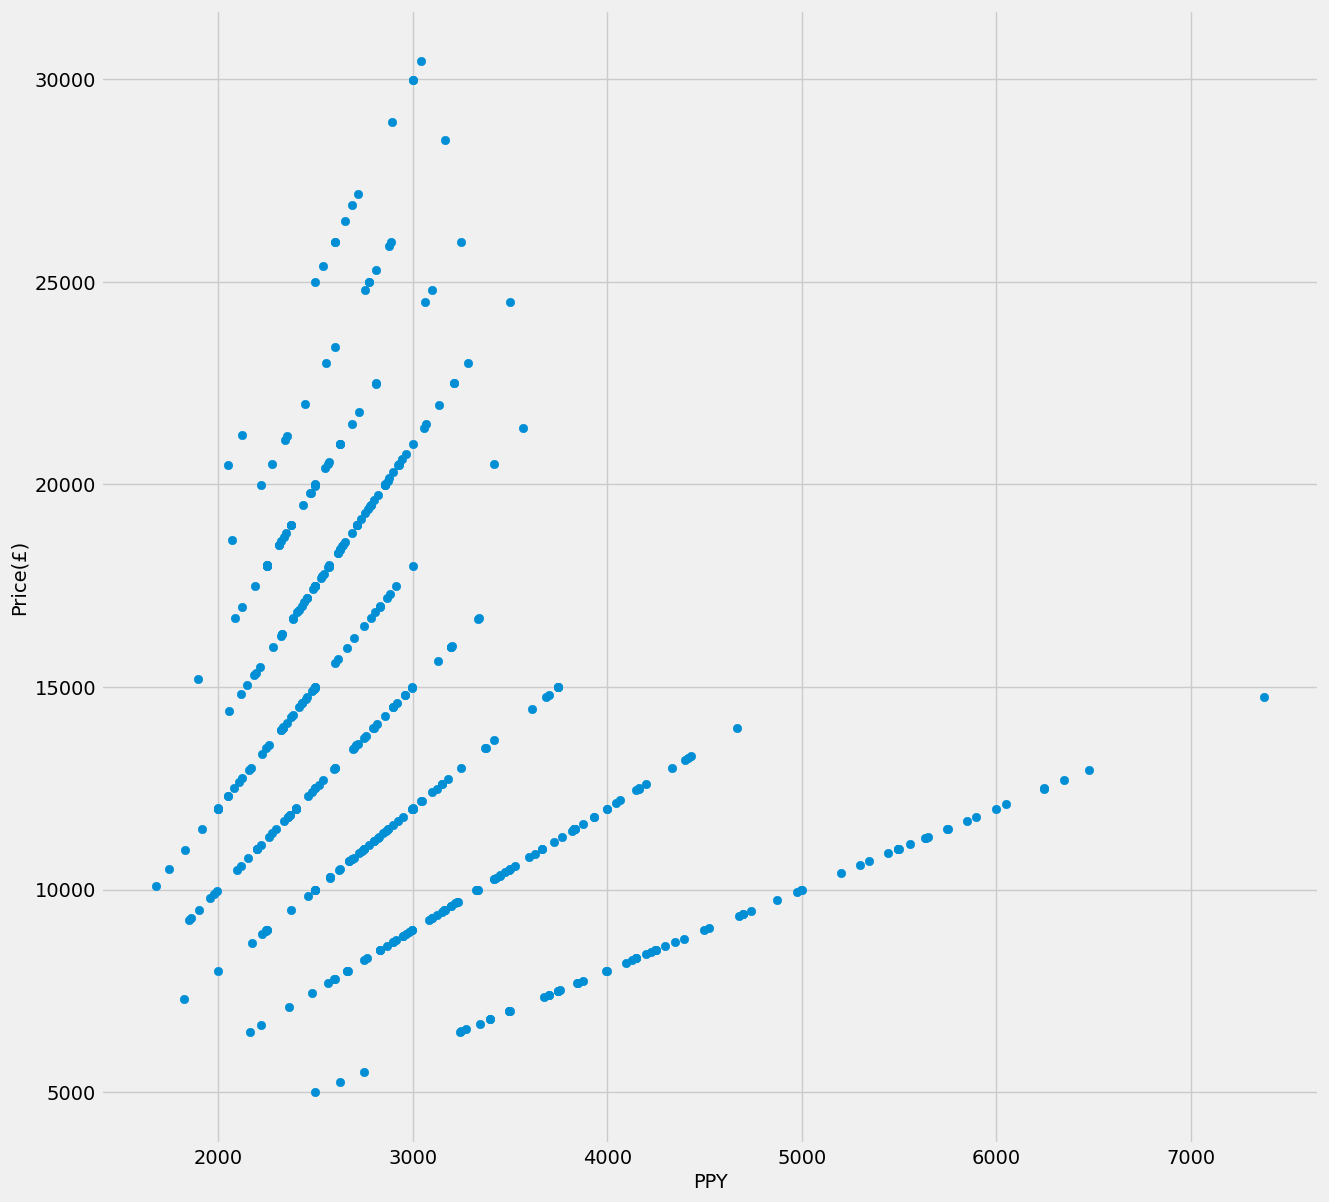

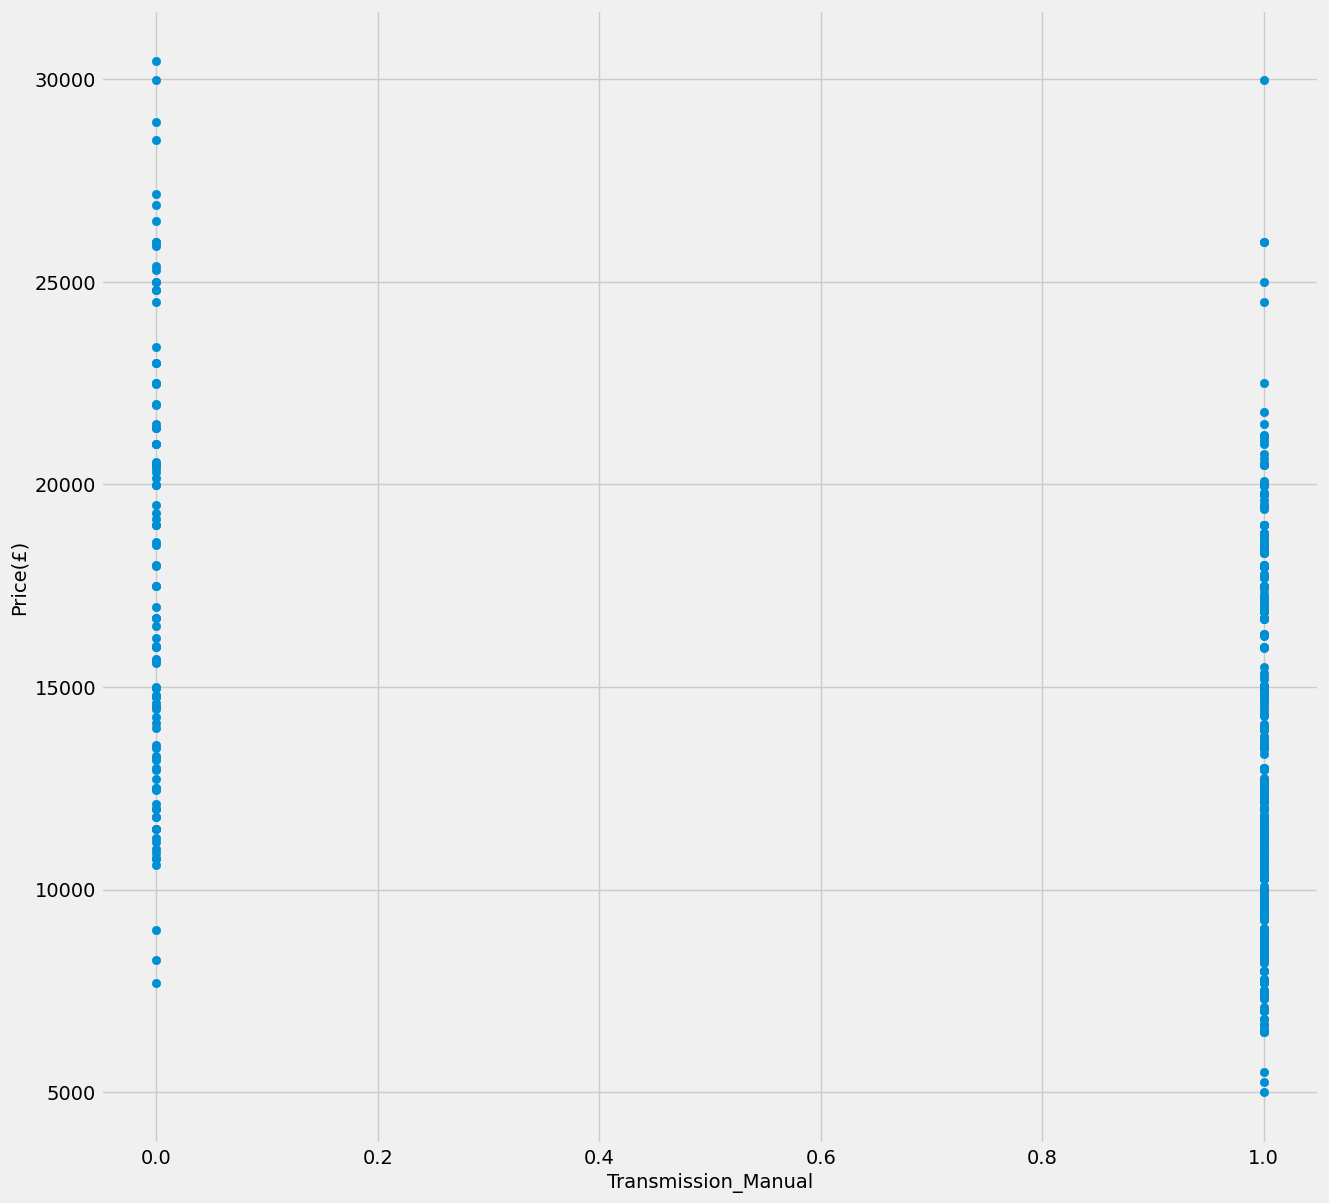

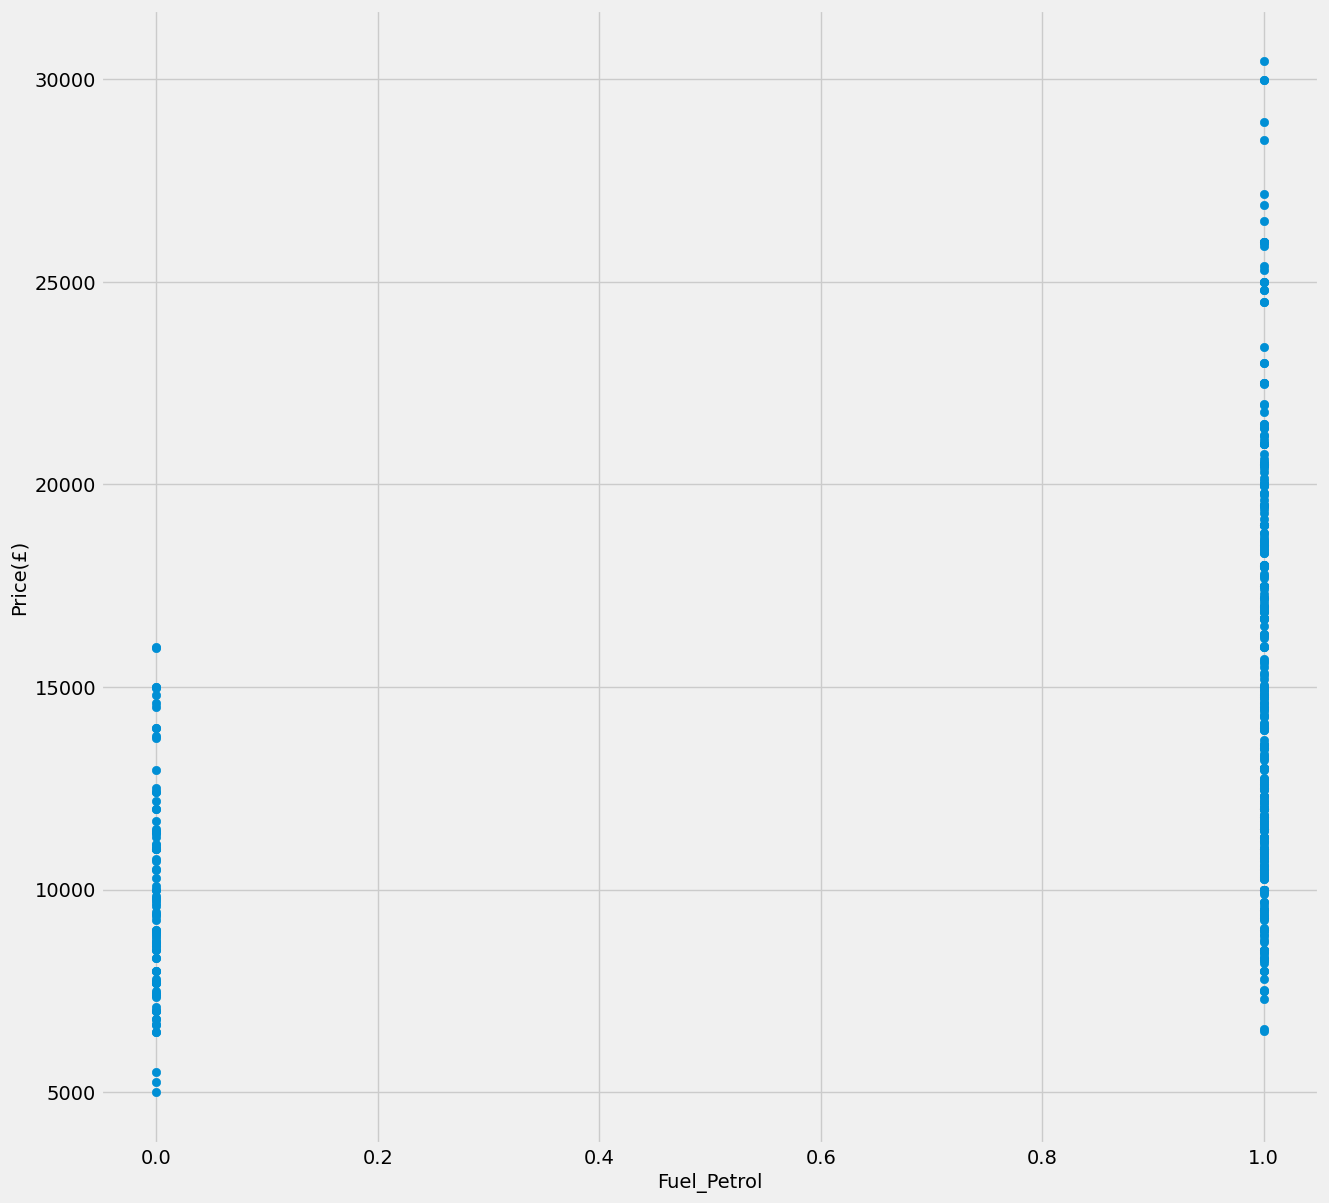

In [7]:
columns = x.columns.tolist() 
x = df.drop('Price(£)', axis=1)
for col in columns:
    
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(14,14))
    plt.scatter(x[col], y)
    plt.xlabel(col, fontsize=14) 
    plt.ylabel('Price(£)', fontsize=14) 
    plt.show()